In [1]:
import sys
import random
import copy
import matplotlib.pyplot as plt
sys.path.append("../")
from src.ga.construct import Indivdual, Population
from src.ga.operators import NonDominatedSort
from src.problems import dtlz3
from src.ga.operators import Operator
from src.ga.algorithm import NSGA

In [2]:
%%time
nsga = NSGA(evalfunc=dtlz3, numVariables=10, numObjects=2)
result = nsga.run(num_step=4)

CPU times: user 572 ms, sys: 3.47 ms, total: 576 ms
Wall time: 574 ms


In [3]:
len(result)

100

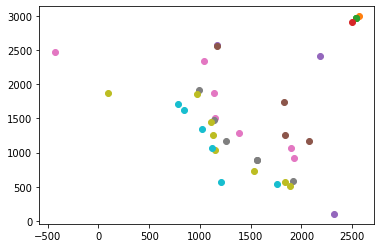

In [4]:
for rank in range(10):
    data = result.extract_rank(rank)
    x = [ind.fitness[0] for ind in data]
    y = [ind.fitness[1] for ind in data]
    plt.scatter(x, y)

In [9]:
type(result)

list